In [1]:
# !pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 

In [3]:
# variable information 
print(forest_fires.variables) 

     name     role         type demographic  \
0       X  Feature      Integer        None   
1       Y  Feature      Integer        None   
2   month  Feature  Categorical        None   
3     day  Feature  Categorical        None   
4    FFMC  Feature   Continuous        None   
5     DMC  Feature      Integer        None   
6      DC  Feature   Continuous        None   
7     ISI  Feature   Continuous        None   
8    temp  Feature   Continuous        None   
9      RH  Feature      Integer        None   
10   wind  Feature   Continuous        None   
11   rain  Feature      Integer        None   
12   area   Target      Integer        None   

                                          description            units  \
0   x-axis spatial coordinate within the Montesinh...             None   
1   y-axis spatial coordinate within the Montesinh...             None   
2                  month of the year: 'jan' to 'dec'              None   
3                     day of the week: 'mon' 

## Exploratory Data Analysis

In [4]:
X.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0


In [5]:
X.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB


Month y day necesitarán ser transformados a valores numéricos para poder ser procesados de algún modo por las regresiones que hemos visto.

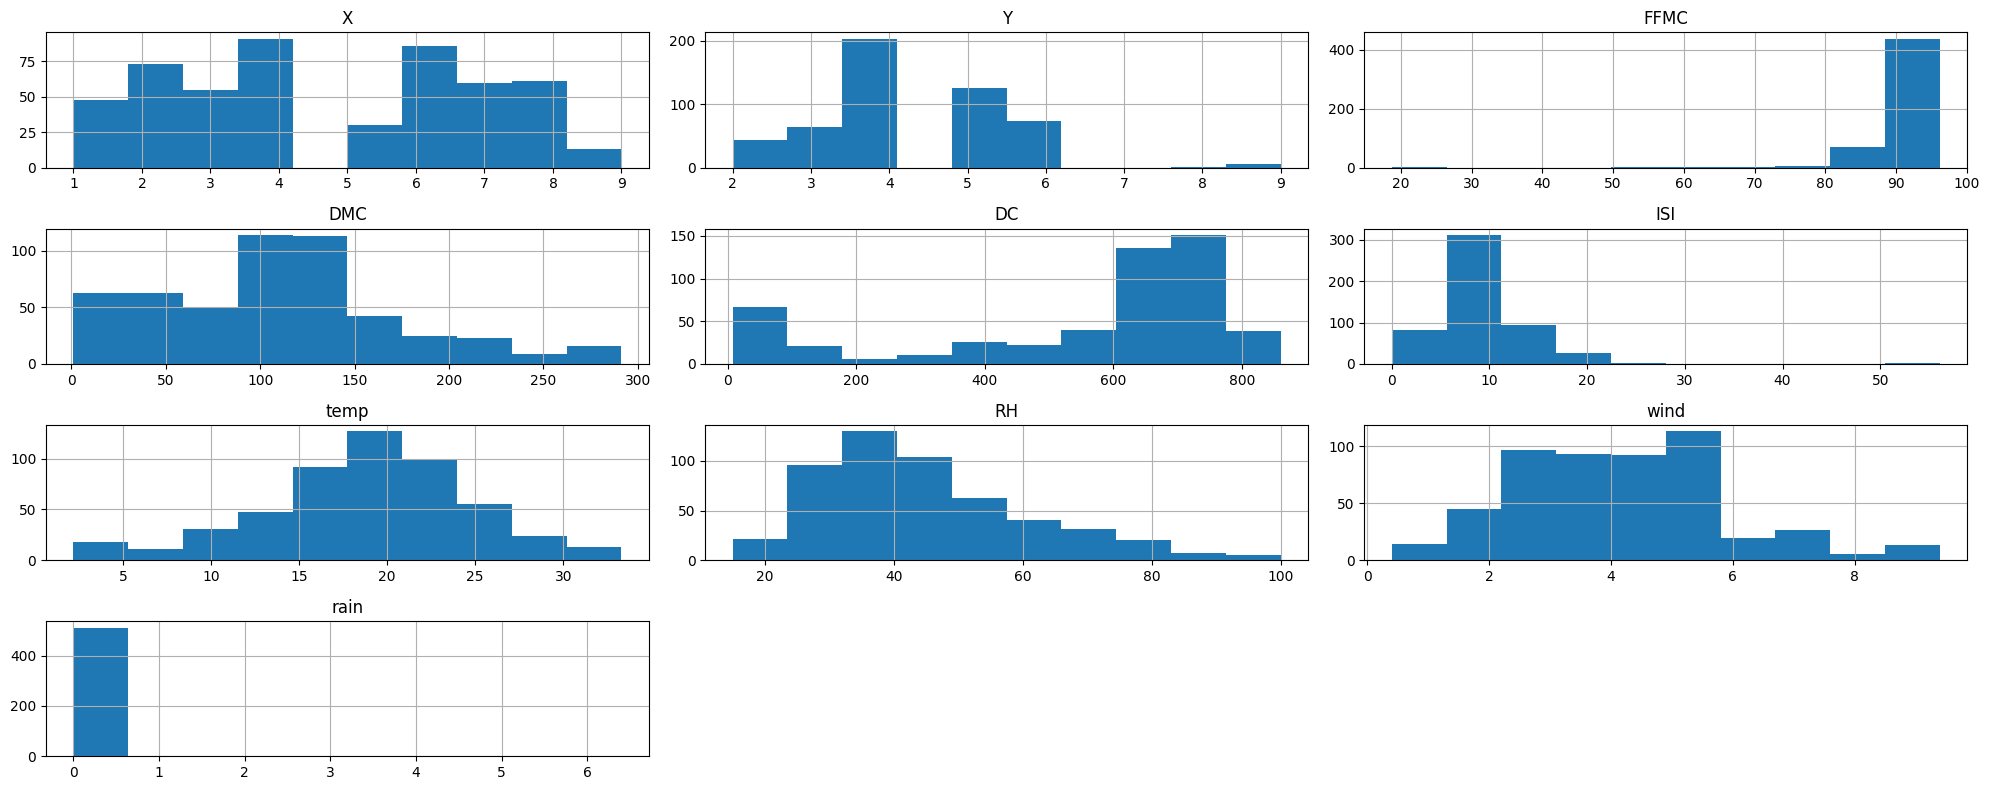

In [7]:
import matplotlib.pyplot as plt

X.hist(figsize=(20, 8))
plt.tight_layout()
plt.show()

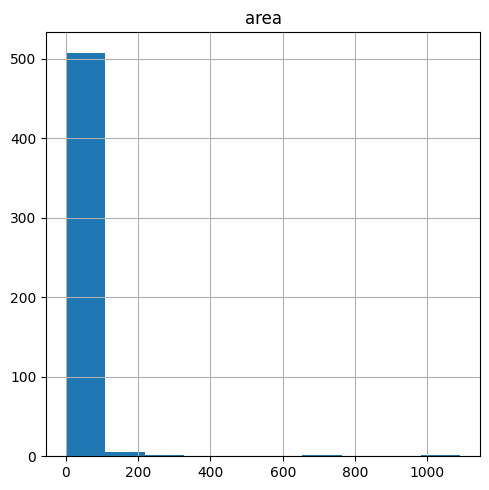

In [8]:
y.hist(figsize=(5, 5))
plt.tight_layout()
plt.show()

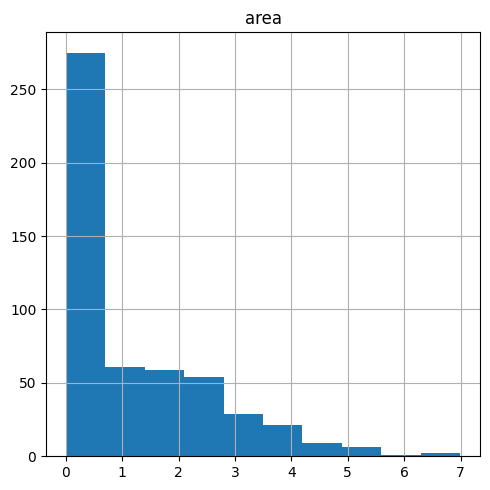

In [8]:
import numpy as np

y_log = np.log1p(y)

y_log.hist(figsize=(5, 5))
plt.tight_layout()
plt.show()

/home/iraitz/TheBridge/FEB24 -BIL  DS PT/TheBridge_DSPT_ML/.venv312/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


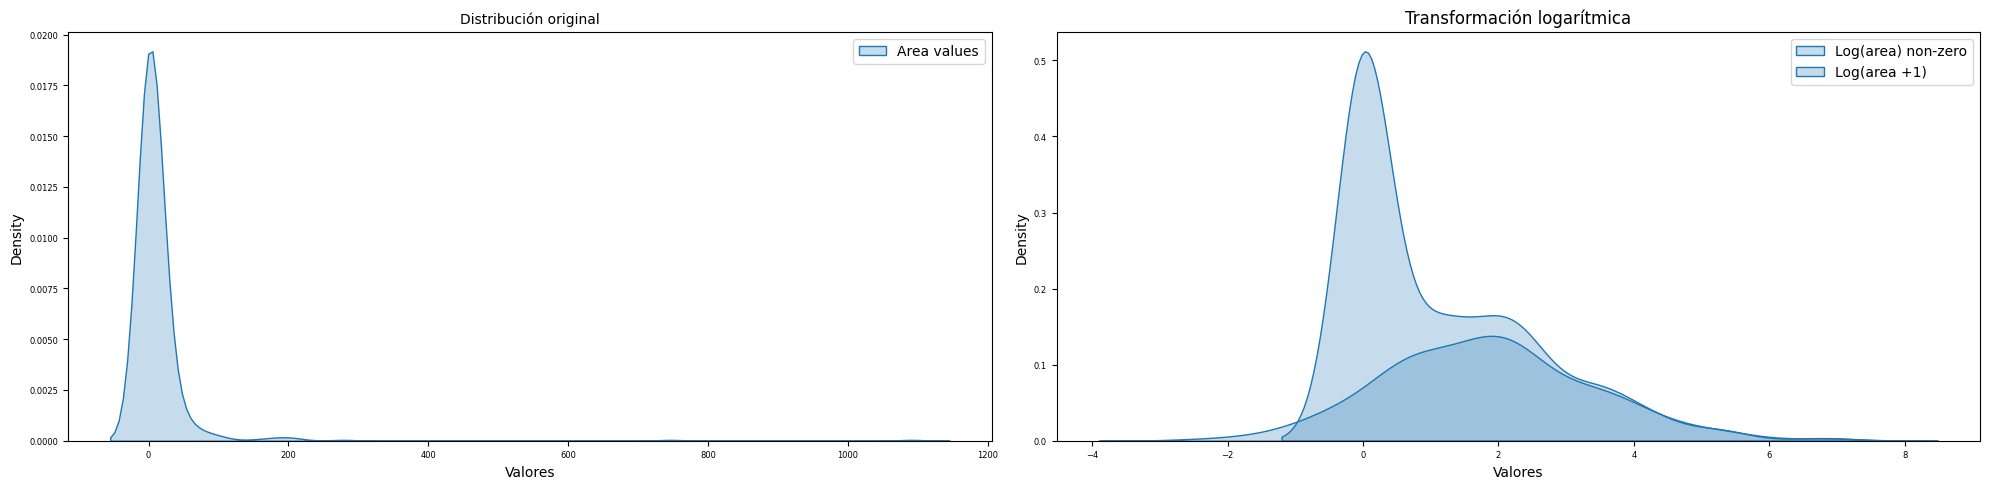

In [9]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.kdeplot(
    y,
    fill    = True,
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Valores') 
axes[0].tick_params(labelsize = 6)
axes[0].legend(["Area values"])

sns.kdeplot(
    np.log(y) ,
    fill    = True,
    ax      = axes[1],
)

sns.kdeplot(
    np.log1p(y) ,
    fill    = True,
    ax      = axes[1],
)
axes[1].set_title("Transformación logarítmica")
axes[1].set_xlabel('Valores') 
axes[1].tick_params(labelsize = 6)
axes[1].legend(["Log(area) non-zero","Log(area +1)"])

fig.tight_layout()

In [10]:
df = X.copy()
df["target"] = y

def custom_log(val):
    if val != 0:
        return np.log(val)
    return 0

df["target"] = df["target"].apply(custom_log)

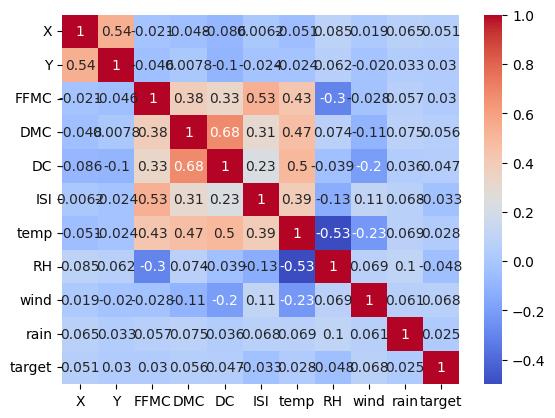

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-0.5);

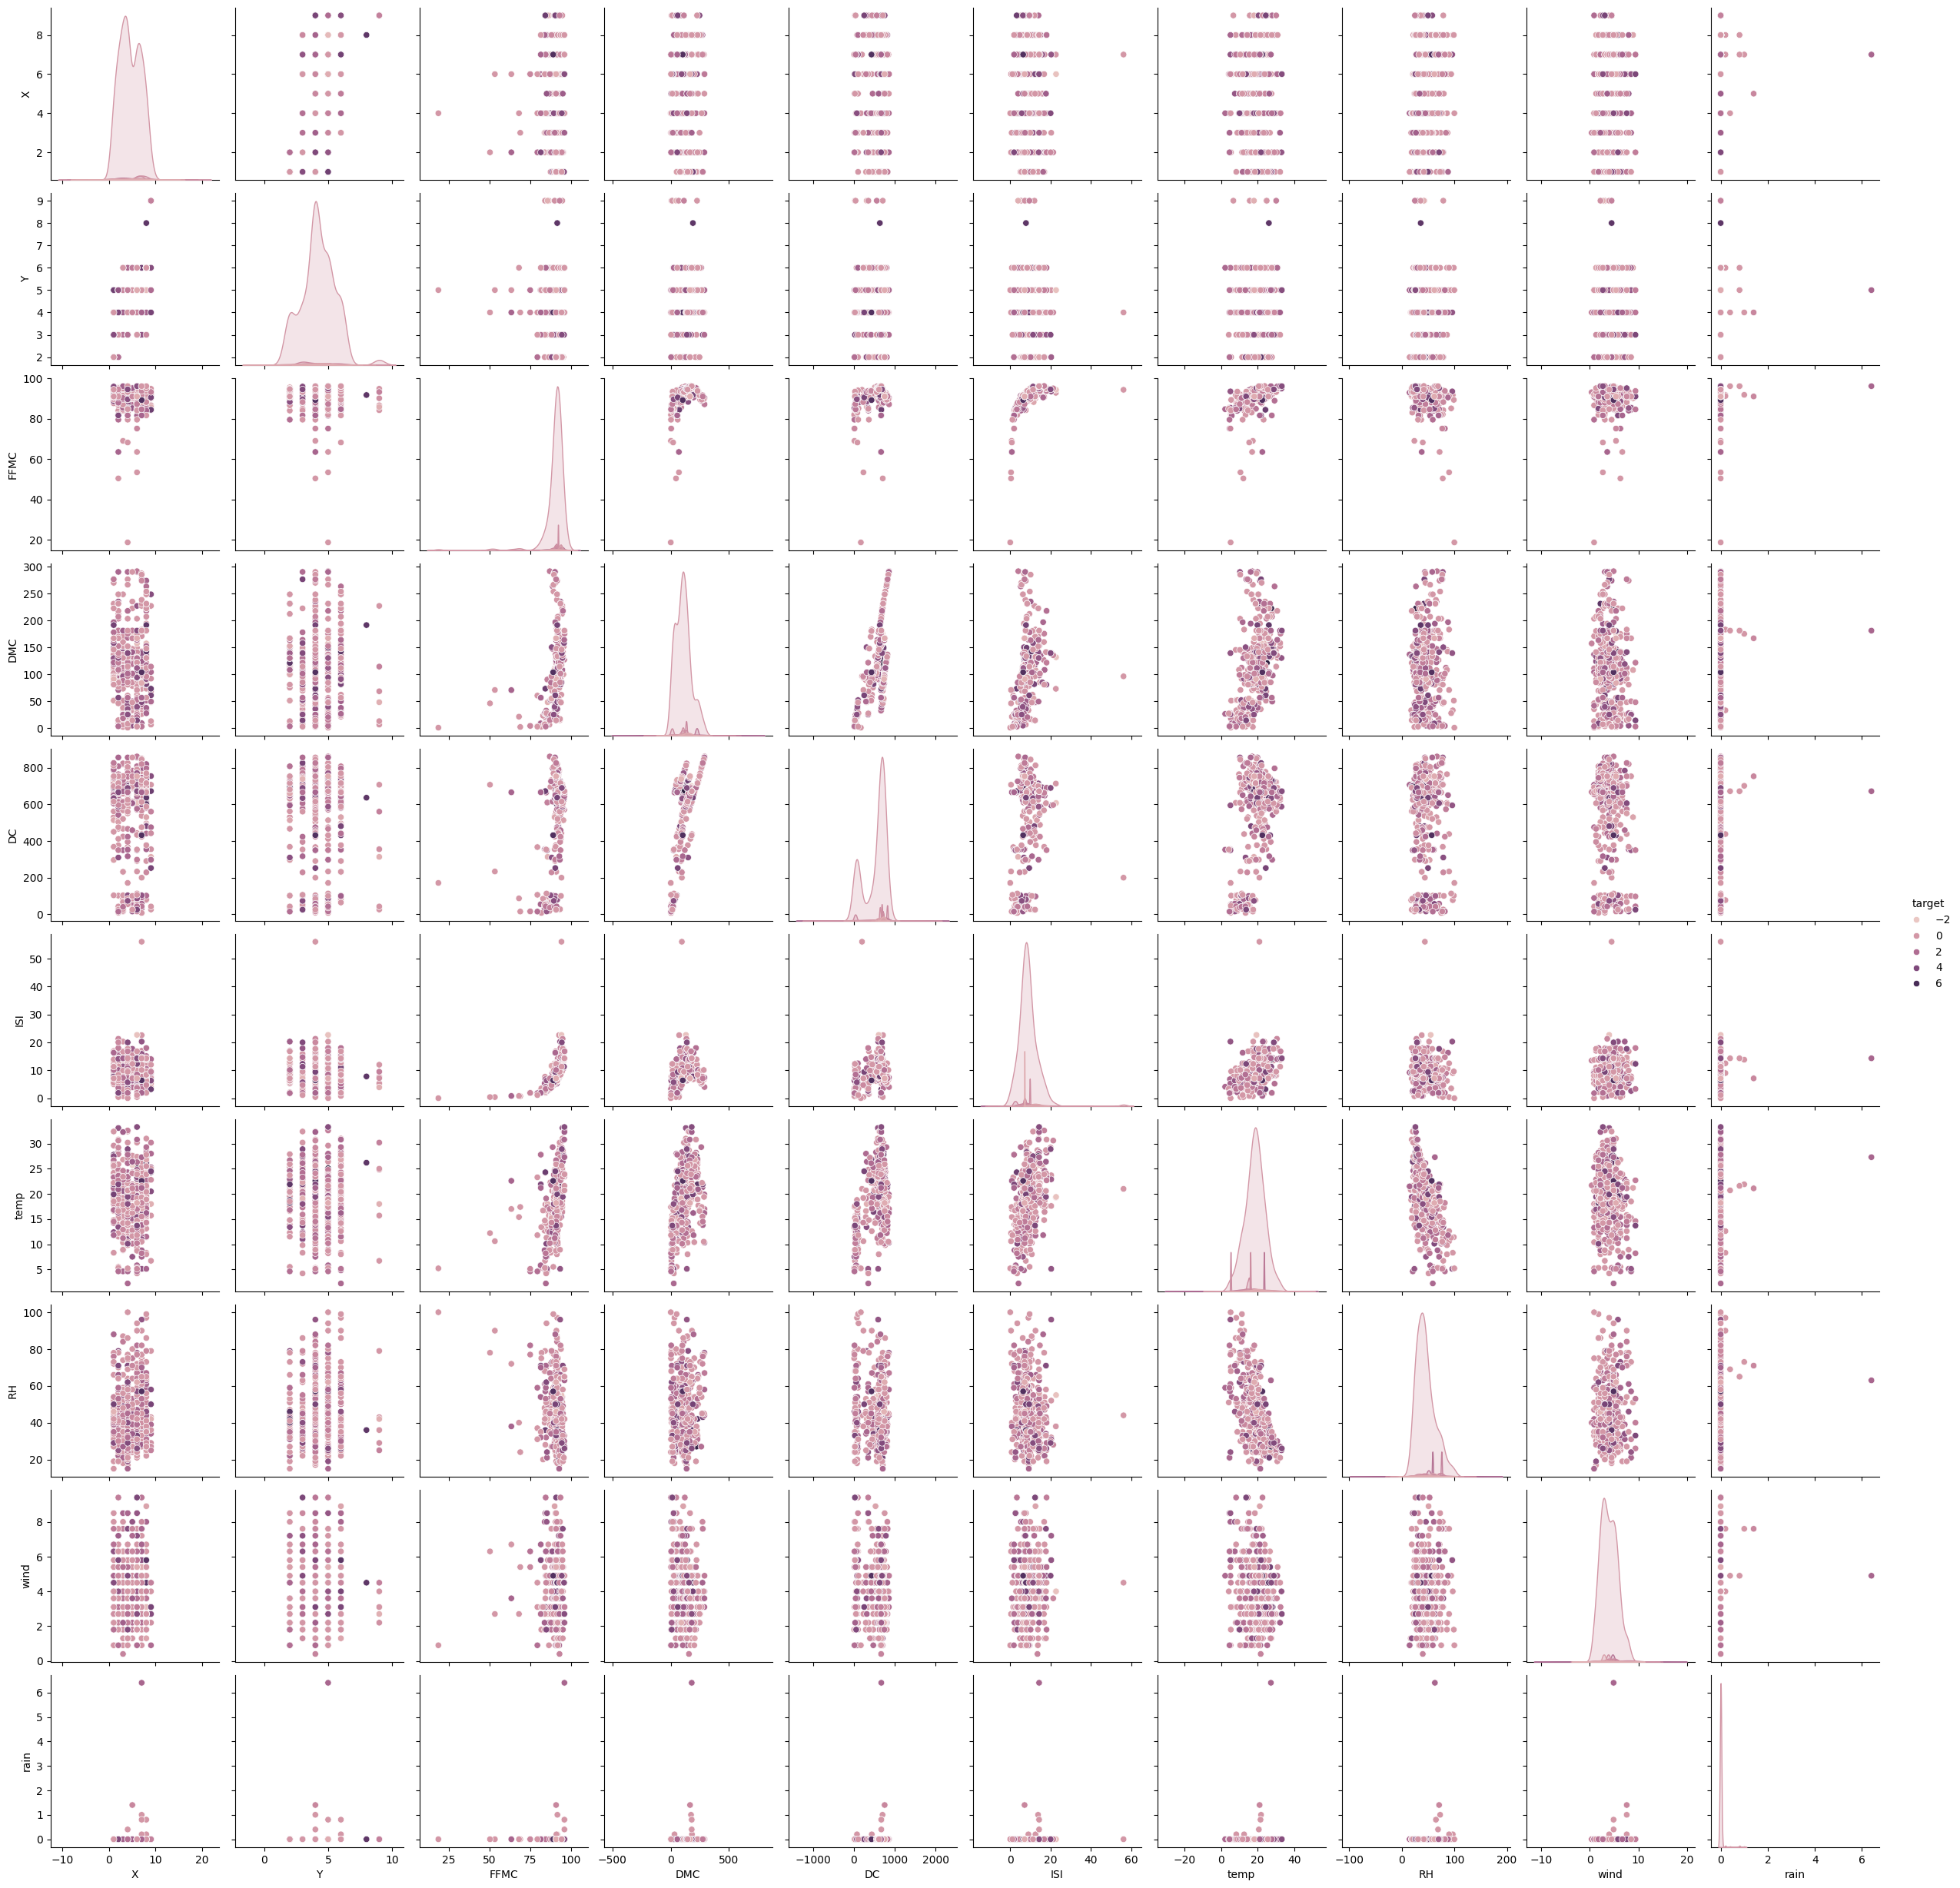

In [12]:
sns.pairplot(df, hue="target")

In [13]:
import pandas as pd

df = pd.concat([df, pd.get_dummies(df["month"]).astype(int), pd.get_dummies(df["day"]).astype(int)], axis=1)

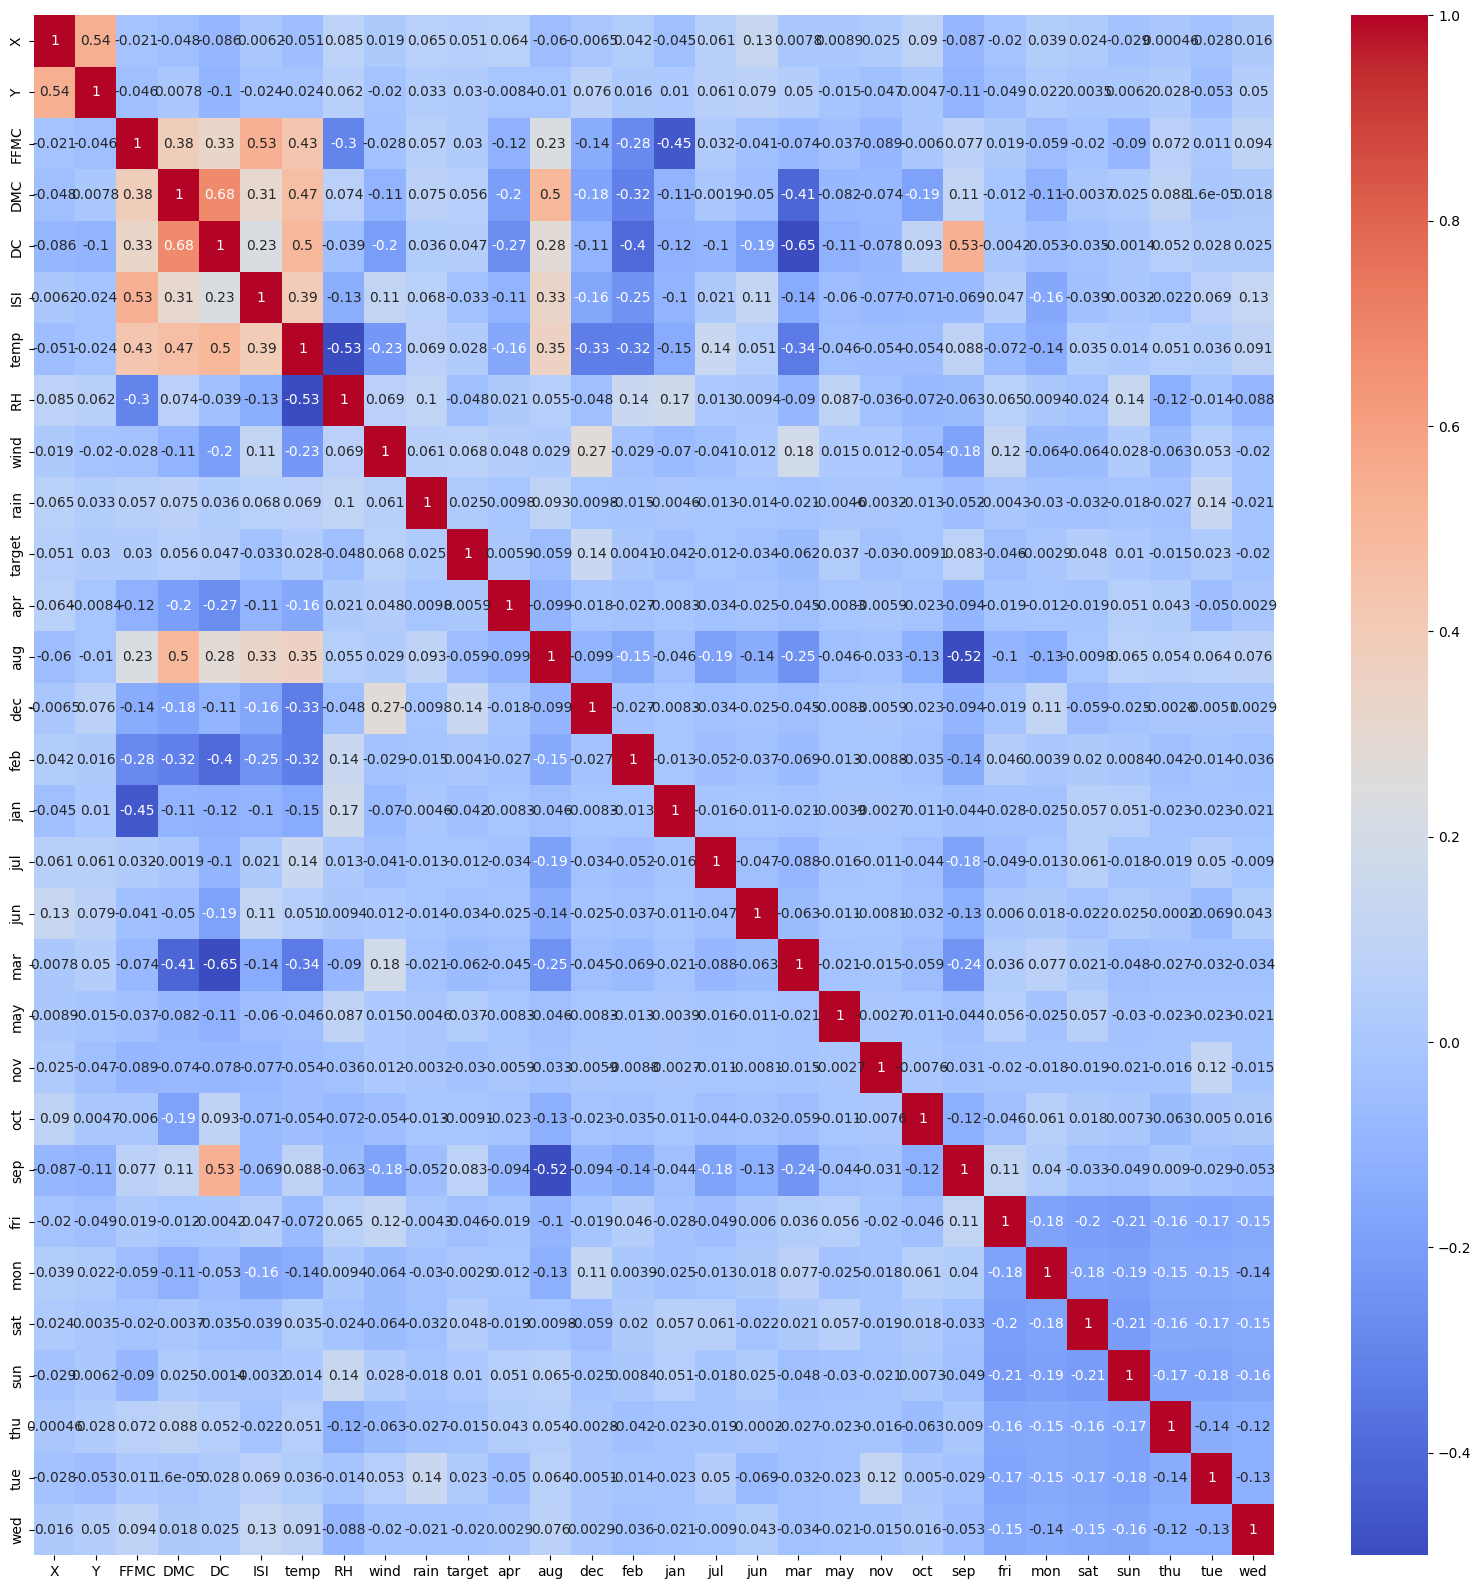

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-0.5);

In [15]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Todo apunta a que hay poco que rascar...

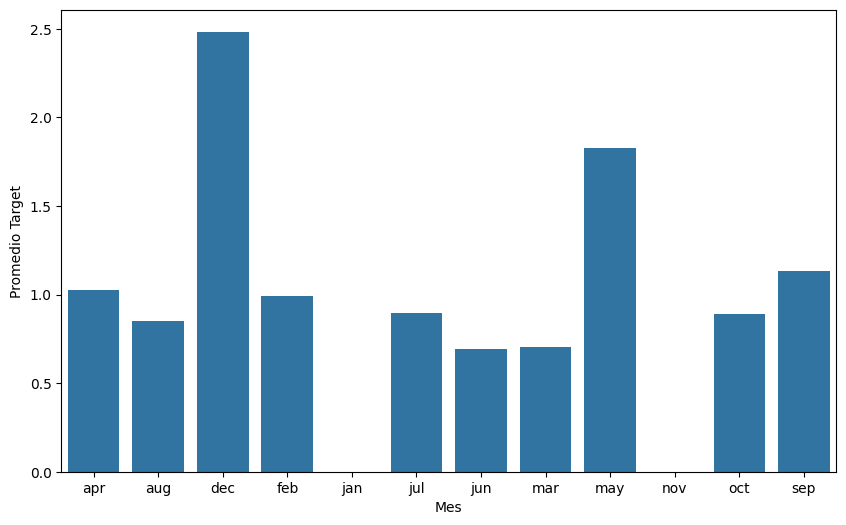

In [16]:
target_mean = df.groupby('month')['target'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=target_mean.index, y=target_mean.values)
plt.xlabel('Mes')
plt.ylabel('Promedio Target')
plt.show()

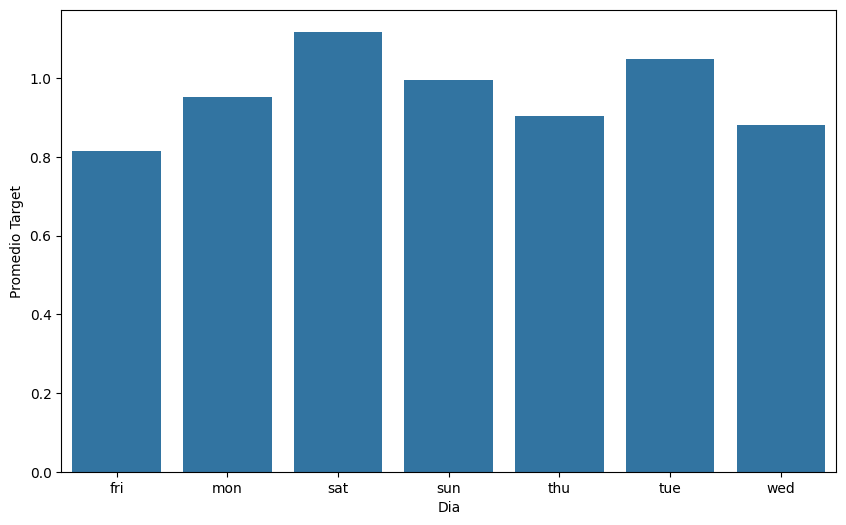

In [17]:
target_mean = df.groupby('day')['target'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=target_mean.index, y=target_mean.values)
plt.xlabel('Dia')
plt.ylabel('Promedio Target')
plt.show()

## Modelamos una regresión

In [18]:
X = df.drop(columns=["target","month","day"])
X.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [19]:
X.dtypes

X         int64
Y         int64
FFMC    float64
DMC     float64
DC      float64
ISI     float64
temp    float64
RH        int64
wind    float64
rain    float64
apr       int64
aug       int64
dec       int64
feb       int64
jan       int64
jul       int64
jun       int64
mar       int64
may       int64
nov       int64
oct       int64
sep       int64
fri       int64
mon       int64
sat       int64
sun       int64
thu       int64
tue       int64
wed       int64
dtype: object

In [20]:
y = df["target"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

log_r = LinearRegression()
log_r.fit(X_train_scal, y_train)
log_r.score(X_test_scal, y_test)

-0.049884587198948394

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = log_r.predict(X_test_scal)

print("R^2 ", r2_score(y_test, y_pred))
print("MAE ", mean_absolute_error(y_test, y_pred))

R^2  -0.049884587198948394
MAE  1.1968880095218637


Nos quedamos con los campos con una mayor correlación (en valor absoluto) con respecto a la variable a predecir.

In [36]:
predictors = df.drop(columns=["month","day"]).corr()['target'].abs().sort_values(ascending=False).index[1:6]
predictors

Index(['dec', 'sep', 'wind', 'mar', 'aug'], dtype='object')

In [37]:
X = df[predictors]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

log_r = LinearRegression()

log_r.fit(X_train_scal, y_train)
log_r.score(X_test_scal, y_test)

0.041841029527997176

In [38]:
y_pred = log_r.predict(X_test_scal)

print("R^2 ", r2_score(y_test, y_pred))
print("MAE ", mean_absolute_error(y_test, y_pred))

R^2  0.041841029527997176
MAE  1.1671293842460992


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [40]:
model.score(X_test, y_test)

0.04745004003813014

In [41]:
y_pred = model.predict(X_test)

print("R^2 ", r2_score(y_test, y_pred))
print("MAE ", mean_absolute_error(y_test, y_pred))

R^2  0.04745004003813014
MAE  1.1586681534287944


In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)

tree_model.fit(X_train_scal, y_train)
tree_model.score(X_test_scal, y_test)

0.05526373647617644

In [44]:
y_pred = tree_model.predict(X_test_scal)

print("R^2 ", r2_score(y_test, y_pred))
print("MAE ", mean_absolute_error(y_test, y_pred))

R^2  0.05526373647617644
MAE  1.1357261530159606


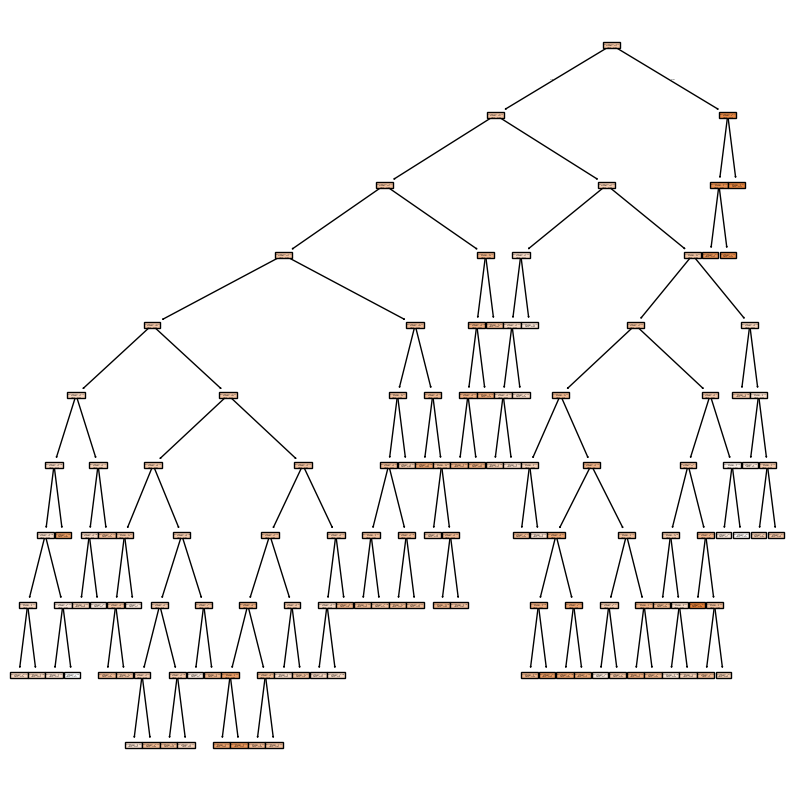

In [45]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))

plot_tree(tree_model,
               feature_names=X.columns,
               filled = True);

In [46]:
from sklearn.tree import export_text

print(export_text(tree_model, feature_names=list(X_train.columns)))

|--- dec <= 4.06
|   |--- wind <= 0.65
|   |   |--- wind <= 0.39
|   |   |   |--- sep <= 0.33
|   |   |   |   |--- wind <= -1.12
|   |   |   |   |   |--- wind <= -1.37
|   |   |   |   |   |   |--- mar <= 1.32
|   |   |   |   |   |   |   |--- aug <= 0.34
|   |   |   |   |   |   |   |   |--- wind <= -1.63
|   |   |   |   |   |   |   |   |   |--- value: [0.42]
|   |   |   |   |   |   |   |   |--- wind >  -1.63
|   |   |   |   |   |   |   |   |   |--- value: [0.51]
|   |   |   |   |   |   |   |--- aug >  0.34
|   |   |   |   |   |   |   |   |--- wind <= -1.63
|   |   |   |   |   |   |   |   |   |--- value: [0.21]
|   |   |   |   |   |   |   |   |--- wind >  -1.63
|   |   |   |   |   |   |   |   |   |--- value: [-0.62]
|   |   |   |   |   |   |--- mar >  1.32
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |--- wind >  -1.37
|   |   |   |   |   |   |--- aug <= 0.34
|   |   |   |   |   |   |   |--- mar <= 1.32
|   |   |   |   |   |   |   |   |--- value: [0.54]
|   |   |   

Recordad que el output será la versión logarítmica de lo que queremos... habrá que usar la función `numpy.exp` para volver al rango original.

Volviendo a los datos originales, había una distribución limpia cuando lso datos no eran cero ¿cierto? Podemos intentar hacer una detección de si será cero o no y sobre los no ceros establecer un modelo de regresión.

In [47]:
X

,dec,sep,wind,mar,aug
0,0,0,6.7,1,0
1,0,0,0.9,0,0
2,0,0,1.3,0,0
3,0,0,4.0,1,0
4,0,0,1.8,1,0
...,...,...,...,...,...
512,0,0,2.7,0,1
513,0,0,5.8,0,1
514,0,0,6.7,0,1
515,0,0,4.0,0,1


In [48]:
y_class = (y == 0).astype(int)
y_class

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: target, Length: 517, dtype: int64

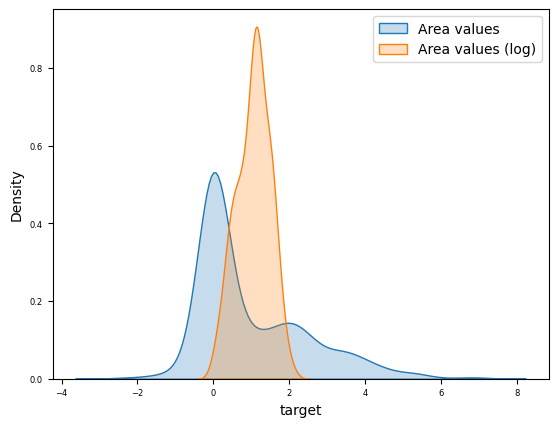

In [49]:
X_reg = X[y > 0]
y_reg = np.log(y[y > 0] + 1) # np.log1p

sns.kdeplot(
    y,
    fill    = True
)
sns.kdeplot(
    y_reg,
    fill    = True
)
plt.tick_params(labelsize = 6)
plt.legend(["Area values","Area values (log)"])

fig.tight_layout()

In [50]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [113]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

class_model = Pipeline(steps=[("scaler", StandardScaler()),
    ('classifier', SVC(gamma="scale", random_state=42))
])

class_model.fit(X_train_class, y_train_class)
class_model.score(X_test_class, y_test_class)

0.6057692307692307

In [114]:
from sklearn.metrics import classification_report

y_pred = class_model.predict(X_test_class)
print(classification_report(y_test_class, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69        53
           1       0.69      0.35      0.47        51

    accuracy                           0.61       104
   macro avg       0.63      0.60      0.58       104
weighted avg       0.63      0.61      0.58       104



Y ahora el modelo centrado en la regresión de los no ceros.

In [115]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

reg_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso())

reg_model.fit(X_train_reg, y_train_reg)
reg_model.score(X_test_reg, y_test_reg)

-0.017494145323459387

Juntamos ambas

In [116]:
y_pred = class_model.predict(X_test)
y_reg = reg_model.predict(X_test[y_pred > 0])

In [117]:
y_pred = y_pred.astype(np.float64)

In [118]:
np.place(y_pred, y_pred > 0, y_reg)

Deberíamos aplicar `np.exp(y_pred) - 1` para retornar al rango original.

In [119]:
# y_pred = np.exp(y_pred) - 1

In [120]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R^2 ", r2_score(y_test, y_pred))
print("MAE ", mean_absolute_error(y_test, y_pred))

R^2  -0.4273778380099458
MAE  1.1740116141306218


In [121]:
error_df = pd.DataFrame({"Area": y_test, "Prediccion": y_pred, "Error Absoluto": abs(y_pred - y_test)})
error_df

,Area,Prediccion,Error Absoluto
304,0.000000,1.059087,1.059087
501,0.000000,0.000000,0.000000
441,0.207014,0.000000,0.207014
153,0.378436,0.000000,0.378436
503,0.667829,0.000000,0.667829
...,...,...,...
167,0.920283,0.000000,0.920283
275,1.682688,0.000000,1.682688
509,0.774727,0.000000,0.774727
513,3.994340,0.000000,3.994340


In [122]:
error_df["Error Absoluto"].mean()

np.float64(1.1740116141306218)

In [13]:
np.mean(y)

np.float64(12.847292069632493)